# Pandas 3
### Spencer Halverson
### MATH 403
### 9/14/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [ ]:
def prob1(file="college.csv"):
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    df = pd.read_csv(file, index_col=0)

    # group the dataframe by whether university is public or private
    private = df.groupby(['Private'])

    # describe the aggregates for the group with the higher mean in each category
    sfratio = private['S.F.Ratio'].get_group(private['S.F.Ratio'].mean().idxmax()).describe().values
    top10perc = private['Top10perc'].get_group(private['Top10perc'].mean().idxmax()).describe().values
    top25perc = private['Top25perc'].get_group(private['Top25perc'].mean().idxmax()).describe().values

    return sfratio, top10perc, top25perc

prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


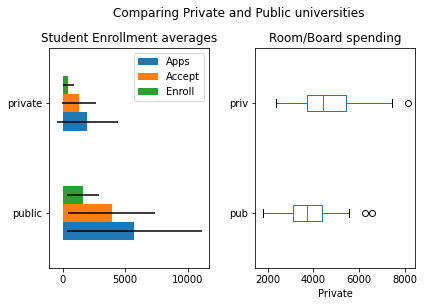

In [ ]:
def prob2(file='college.csv'):
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    # Read data
    df = pd.read_csv(file, index_col=0)

    # group the dataframe by whether university is public or private
    private = df.groupby(['Private'])

    # plot formatting
    fig, axs = plt.subplots(1,2)
    axs = axs.ravel()
    
    # set_yticklabels

    # 1. Compare num applicants, accepted and enrolled students 
    #     between private and public
    private[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh", 
                                                      xerr = private.std(), 
                                                      ax=axs[0])
    axs[0].set_title("Student Enrollment averages")
    axs[0].set_ylabel("")
    axs[0].set_yticklabels(['public', 'private'])

    # 2. Compare range of money spent on room/board between private and public 
    df.boxplot('Room.Board', by='Private', grid=False, vert=False, ax=axs[1])
    axs[1].set_title("Room/Board spending")
    axs[1].set_yticklabels(['pub', 'priv'])
    plt.subplots_adjust(hspace=1)
    plt.suptitle("Comparing Private and Public universities", x=0.56, y=1.05)
    plt.tight_layout()
    plt.show()
    
prob2()

# Problem 3

In [10]:
def prob3(file='Ohio_1999.csv'):
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    # Read Ohio data
    ohio = pd.read_csv(file)

    # calculate cumulative weekly earnings
    w = ohio.pivot_table(values="Usual Weekly Earnings", index="Race", 
                         columns="Sex", aggfunc="sum")
    w_vals = np.unravel_index(w.values.argmax(), w.values.shape)
    w_vals = (w_vals[0] + 1, w_vals[1] + 1)

    # calculate cumulative hours worked and find race/sex combo with minimum
    h = ohio.pivot_table(values="Usual Hours Worked", index="Race", 
                         columns="Sex", aggfunc="sum")
    h_vals = np.unravel_index(h.values.argmin(), h.values.shape)
    h_vals = (h_vals[0] + 1, h_vals[1] + 1)

    # calculate avg hours worked and find max among race/sex combos
    a = ohio.pivot_table(values="Usual Hours Worked", index="Race", 
                         columns="Sex", aggfunc="mean")
    a_vals = np.unravel_index(a.values.argmax(), a.values.shape)
    a_vals = (a_vals[0] + 1, a_vals[1] + 1)
    

    return w_vals, h_vals, a_vals


prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [43]:
def prob4(file = "Ohio_1999.csv"):
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    # read data
    ohio = pd.read_csv(file)
    # Partition persons into categories based on educational attainment
    edu = pd.cut(ohio['Educational Attainment'], [0, 38, 42, 46])
    e = ohio.pivot_table(index=edu, aggfunc='count')
    ans1 = e.sum(axis=1).idxmax()
    
    # partition in 6 age categories, choose max avg weekly hours worked
    age = pd.qcut(ohio['Age'], 6)
    age_table = ohio.pivot_table(values='Usual Hours Worked', 
                                 index=age, aggfunc='mean')
    ans2 = age_table.sum(axis=1).idxmax()

    # using partitions from parts 1 and 2, find age/degree combo 
    #   w/ lowest avg yearly salary
    salary = ohio.pivot_table(values='Yearly Salary', index=age, 
                              columns=edu, aggfunc='mean'
                              )
    ans3 = (salary.sum(axis=1).idxmin(), salary.sum(axis=0).idxmin())

    return ans1, ans2, ans3

prob4()

(Interval(38, 42, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [14]:
def prob5(file='college.csv'):
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    # read data
    college = pd.read_csv(file, index_col=0)
    # 1. Determine whether BOTH priv and pub schools have corr between  
    #    % alumni that donate and amount school spends per student 
    openness = college.groupby(['Private'])
    private = openness.get_group('Yes')
    # public = openness.get_group('No')
    donate = pd.cut(college['perc.alumni'], [0, 20, 40, 60, 80, 100])
    donate_table = college.pivot_table(values='Expend', index=donate,
                                       columns='Private', aggfunc='mean',
                                       fill_value='-')

    ans1 = False # for Public, it goes up then down, but private just goes up

    # 2. partition grad.rate, decide if the partition with 
    #    greatest number of schools
    grad = pd.cut(college['Grad.Rate'], [0, 20, 40, 60, 80, 100])
    grad_table = college.pivot_table(values='Grad.Rate', index=grad, 
                                     columns=['Private'], aggfunc='count', 
                                     fill_value='-')
    
    ans2 = (grad_table['No'].idxmax()==grad_table['Yes'].idxmax()) # False

    # 3. For both private and public, does lower acceptance rate correlate with
    #   more students from top 10 percent of high school class?
    college['Accept.Rate'] = college['Accept']/college['Apps']
    acc = pd.cut(college['Accept.Rate'], [0,.2,.4,.6,.8,1.0])
    top = college.pivot_table(values='Top10perc', index=acc, columns='Private',
                              aggfunc='mean', fill_value='-')
    # print(top)

    ans3 = True

    # 4. Why is avg percentage of students from Top10 perc of H.S. class so high
    #  in private universities with low acceptance rates
    
    ans4 = "We saw in part 3 that acceptance rate negatively correlates with \
percentage of students from top 10 percent of H.S. class. Because of this \
negative correlation, it follows that private universities with low \
acceptance rates will have high avg. percentage of students from top 10 \
percent of high school class."

    return ans1, ans2, ans3, ans4

prob5()

(False,
 False,
 True,
 'We saw in part 3 that acceptance rate negatively correlates with percentage of students from top 10 percent of H.S. class. Because of this negative correlation, it follows that private universities with low acceptance rates will have high avg. percentage of students from top 10 percent of high school class.')